### Chargement des modules d'analyse

In [380]:
import pandas as p
import numpy as n
import matplotlib.pyplot as m

### Pour faire l'affichage avec la bibliothèque graphique intégrée

In [382]:
%matplotlib inline

In [1310]:
m.rc("savefig", dpi=150)

### Chargement des données

In [7]:
d=p.read_excel(r"C:\Users\Dell\Desktop\zzzzz\planification\projet planification\RXLev Prediction.xlsx")

# Visualisation des données 
## Cette etape est tres importante, en effet,elle permet de:
* Prendre des décisions en se qui concerne la qualité des informations disponibles.(Par exemple, Le fait de se disposer de données brutes au sein de tableaux Excel peut etre * truquer.On prevoit une donnee de type float ,mais ,en réalité, elle est de type string)
* Avoir l'ordre de grandeur des donnees,leurs dimensions,des informations comme la moyenne ,l'ecart type,la mediane et sa dispertion par rapport à le max
* les points aberrants et comment les traités
* La relation entre les differentes variables afin d'eliminer les variables trop correlées(deux vaiables correles reduient les performances du modele) ou exprimer l'une en fonction des autres
* Predir le modele à utiliser (Dans ce cas,un modele gaussien en deux dimensions)

In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65712 entries, 0 to 65711
Data columns (total 3 columns):
X(m)        65712 non-null float64
Y(m)        65712 non-null float64
Pr (dBm)    65712 non-null float64
dtypes: float64(3)
memory usage: 1.5 MB


* Avoir l'ordre de grandeur des donnees,leurs dimensions,des informations comme la moyenne ,l'ecart type,la mediane et sa dispertion par rapport à le max

In [9]:
d.describe()

,X(m),Y(m),Pr (dBm)
count,65712.000000,65712.000000,65712.000000
mean,523175.993899,393702.753159,-90.448841
std,988.049198,1485.870049,9.187064
min,521040.620000,390819.390000,-102.000000
25%,522351.117500,392575.637500,-98.000000
50%,523127.145000,393619.950000,-92.125000
75%,523957.172500,394779.292500,-85.187500
max,526160.440000,397163.700000,-56.250000


* les pts aberrants avec un boxplot

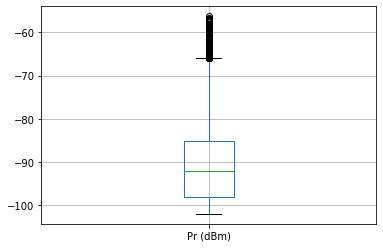

In [10]:
d[['Pr (dBm)']].boxplot(grid=True)

* les pts aberrants

In [11]:
d[d['Pr (dBm)']>-73]

,X(m),Y(m),Pr (dBm)
13,522702.09,393886.79,-70.0000
23,522861.80,393855.27,-72.6250
40,522648.97,393557.27,-71.8750
48,522122.68,393952.28,-72.1250
60,522691.24,393796.88,-69.8125
...,...,...,...
65477,522688.97,393556.89,-72.1875
65487,522058.14,393472.86,-71.7500
65509,522542.95,393978.30,-69.7500
65650,522692.95,393976.88,-71.1875


* Les relations entre les differents variables

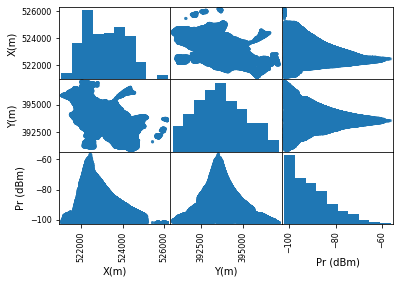

In [12]:
p.plotting.scatter_matrix(d);

* Les correlations entre les differents variables

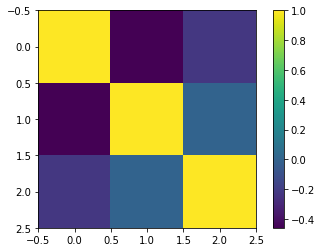

In [30]:

m.imshow(d.corr())
m.colorbar();

*  La puissance recue en fonction des coordonnees

In [137]:
from mpl_toolkits.mplot3d import Axes3D

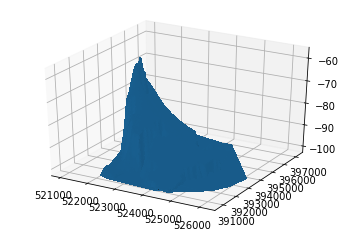

In [1306]:
X_=d["X(m)"].values
Y_=d["Y(m)"].values
PR_=d["Pr (dBm)"].values
fig = m.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(X_, Y_, PR_, linewidth=0, antialiased=False)

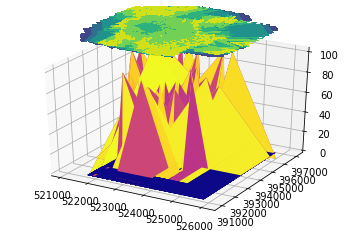

In [240]:
xmesh,ymesh=n.meshgrid(X_[::100],Y_[::100])
prmesh=n.zeros((658,658))
PR_1=PR_[::100]
for i in range (658):
    prmesh[i,i]=n.abs(PR_1[i])
    
fig = m.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xmesh,ymesh,prmesh, cmap='plasma')
cset = ax.contourf(xmesh, ymesh,prmesh, zdir='z', offset=130)

# Importance des faires le rescaling
* Cest le fait de convertir les donnees à des valeurs inferieurs facile à manipuler avec une moyenne nulle et une variance unitaire en conservant les informations incluses

In [383]:
from sklearn.preprocessing import StandardScaler
s1_=StandardScaler()
x_=s1_.fit_transform(X_.reshape(65712,1))
s2_=StandardScaler()
y_=s2_.fit_transform(Y_.reshape(65712,1))
s3_=StandardScaler()
pr_=s3_.fit_transform(PR_.reshape(65712,1))

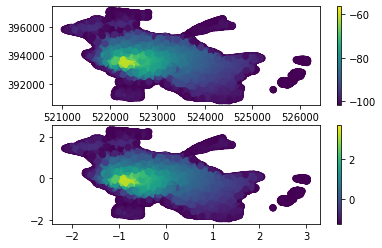

In [384]:
m.subplot(2,1,1)
m.scatter(X_,Y_,c=PR_);
m.colorbar();
m.subplot(2,1,2)
m.scatter(x_,y_,c=pr_);
m.colorbar();

# Essai numero 1
** Modele de regression lineaire

* Specifications des variables et rescaling

In [34]:
from sklearn.preprocessing import StandardScaler
CO=d[["X(m)","Y(m)"]].values
PR=d["Pr (dBm)"].values
s1=StandardScaler()
co=s1.fit_transform(CO.reshape(65712,2))
s2=StandardScaler()
pr=s2.fit_transform(PR.reshape(65712,1))

* Echantionnage aleatoire
* Création des données de training et de test en fractionnant les données originales dans 95% des données de training et 0.5% des données de test.


In [35]:
from sklearn.model_selection import train_test_split
coordtrain,coordtest,prtrain,prtest=train_test_split(co,pr,test_size=0.005,random_state=1)

* Regression lineaire multi dimensionnelle avec Ordinary Least Squares (OLS)
* Compilation du modèle et fitting des training data
* Traçage des predictions des donnees tests et les métriques de performances du modèle pour vérifier ses performances


2.523520833984831
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.062
Model:                            OLS   Adj. R-squared (uncentered):              0.062
Method:                 Least Squares   F-statistic:                              2165.
Date:                Thu, 05 Dec 2019   Prob (F-statistic):                        0.00
Time:                        21:23:17   Log-Likelihood:                         -90692.
No. Observations:               65383   AIC:                                  1.814e+05
Df Residuals:                   65381   BIC:                                  1.814e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

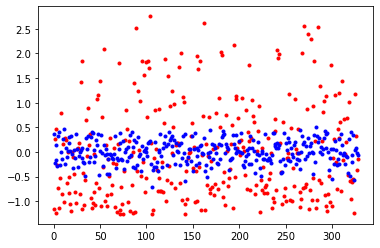

In [36]:
import statsmodels.api as sm
from sklearn import metrics
est = sm.OLS(prtrain,coordtrain).fit()
prpredict=est.predict(coordtest)
m.plot(prtest,'r.')
m.plot(prpredict,'b.')
print(metrics.max_error(prtest,prpredict))
print(est.summary())


# Traçage des predictions des donnees tests et leurs valeurs reelles  pour vérifier les performances

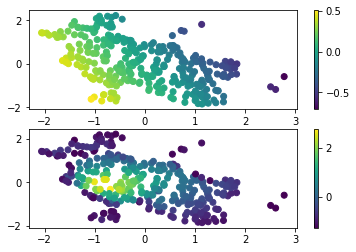

In [389]:
xx=[]
for k in range (len(coordtest)):
    xx.append(coordtest[k][0])
yy=[]
for k in range(len(coordtest)):
    yy.append(coordtest[k][1])
m.subplot(2,1,1)
m.scatter(xx,yy,c=prpredict);
m.colorbar();
m.subplot(2,1,2)
m.scatter(n.reshape(xx,-1), n.reshape(yy,-1), c=n.reshape(prtest,-1))
m.colorbar();

# Les predictions suivent une logique. En effet,Plus on s'eloigne du bts moins la valeur du puissance recue sera
# Cependant ils sont un peu disperses des valeurs reelles vu qu ils ne prennent pas en compte les contraintes geographiques
# (les performances de ce modele seront optimales si on a une bases de donnees geographique)

* Applications du modele sur les donnees envoyées afin de predire leurs Puissances recues

In [39]:
dd=p.read_excel(r"C:\Users\Dell\Desktop\zzzzz\planification\projet planification\CoordToRXLev.xlsx")

# Visualisation des données

In [40]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131664 entries, 0 to 131663
Data columns (total 2 columns):
X(m)    131664 non-null float64
Y(m)    131664 non-null float64
dtypes: float64(2)
memory usage: 2.0 MB


* Prediction en utilisant le modele deja acquis
* Traçage des predictions des puissances 
* L'autre courbe est celle des valeurs de puissance du training data pour vérifier les performances


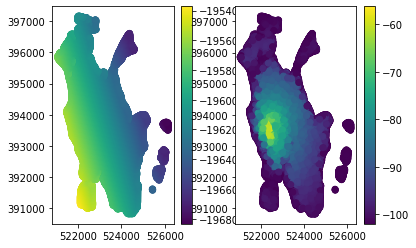

In [41]:
coordForPred=dd[['X(m)','Y(m)']]
predicted=est.predict(coordForPred)
xxx=dd['X(m)'].values
yyy=dd['Y(m)'].values
m.subplot(1,2,1);
m.scatter(xxx,yyy,c=predicted);
m.colorbar();
m.subplot(1,2,2);
m.scatter(X_,Y_,c=PR_);
m.colorbar();

# Essai numero 2
** Deep learning

### Chargement des modules d'analyse

In [339]:
import keras
from keras.layers import Conv2D,Conv1D, MaxPool2D,MaxPool1D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import seaborn as sns

In [393]:
za=CO[::100]
az=PR_[::100]

# * Definition du modèle
# * Compilation du modèle et fitting des training data


def create_model():
    
    model = Sequential()
    model.add(Conv1D(1, kernel_size = [1], padding = 'same', activation = 'relu', input_shape = (1,1)))
    model.add(Conv1D(32, kernel_size = [3], padding = 'same', activation = 'relu'))
    model.add(MaxPool1D(pool_size = [1]))
    
    model.add(Conv1D(32, kernel_size = [3], padding = 'same', activation = 'relu'))
    model.add(Conv1D(64, kernel_size = [3], padding = 'same', activation = 'relu'))
    model.add(MaxPool1D(pool_size = [1]))
    
    model.add(Conv1D(128, kernel_size = [3], padding = 'same', activation = 'relu'))
    model.add(Conv1D(256, kernel_size = [3], padding = 'same', activation = 'relu'))
    model.add(MaxPool1D(pool_size = [1]))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(29, activation = 'softmax'))
    
    model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])
    
    print("MODEL CREATED")
    model.summary()
    
    return model

def fit_model():
    model_hist = model.fit(za, az, batch_size = 1, epochs = 30, validation_split = 0.1)
    return model_hist 

model = create_model()
curr_model_hist = fit_model()

# Ca n'a pas marcher. J'ai eu une probleme au niveau du shaping de l'input
# Je ne vois pas ou se situe l'erreur.J'ai essayé plus de 300 fois. 
# Inchallah je vais le faire apres mes examens
# Malgre que ca bien marcher pour mon projet tutoré.J'ai eu une precision superieur à 96% comme indiqué dans la capture ci dessous

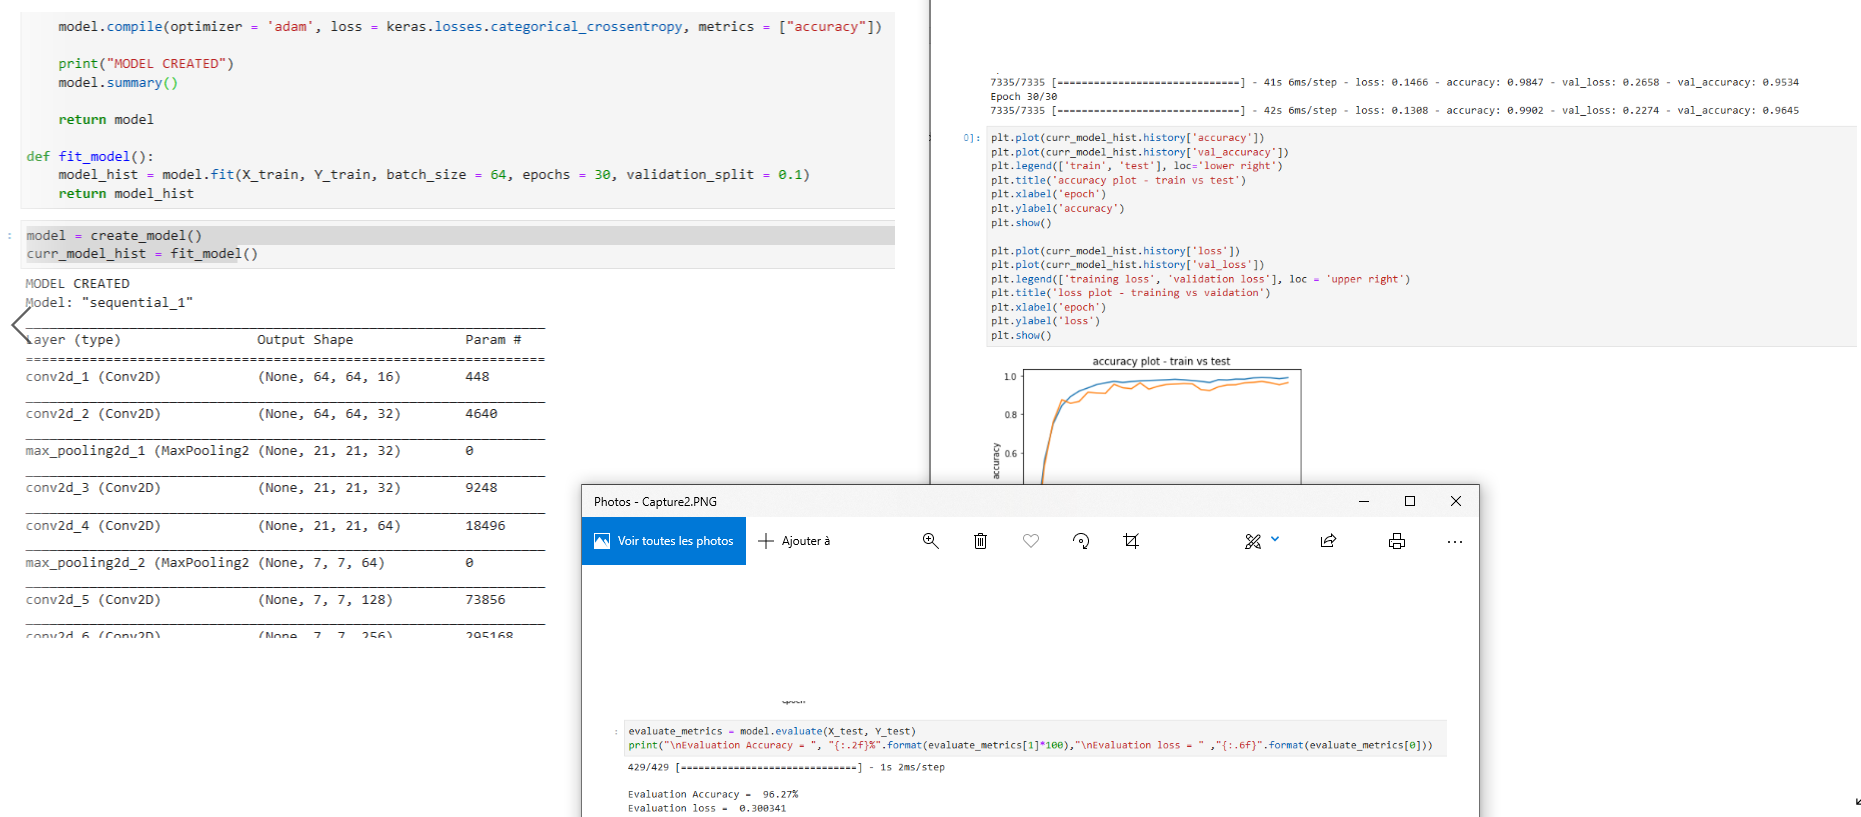

In [424]:
from IPython.display import Image
Image("C:/Users/Dell/Desktop/Capture.png")

# Essai avec CNN mais sans convolution ci dessous ne donne pas la precision demandee

In [1308]:
def create_model():
    
    model = Sequential()
    model.add(Dense(16, activation = 'relu', kernel_regularizer = regularizers.l2(0.001),input_shape = (2,)))
    model.add(Dense(32, activation = 'relu'))    
    
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'relu'))
    
    model.compile(optimizer = 'adam',loss = keras.losses.binary_crossentropy, metrics = ["accuracy"])
    
    print("MODEL CREATED")
    model.summary()
    
    return model

def fit_model():
    model_hist = model.fit(coordtrain,prtrain, batch_size = 2, epochs = 1, validation_split = 0.1)
    return model_hist 

In [1309]:
model = create_model()
curr_model_hist = fit_model()

MODEL CREATED
Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 16)                48        
_________________________________________________________________
dense_157 (Dense)            (None, 32)                544       
_________________________________________________________________
batch_normalization_54 (Batc (None, 32)                128       
_________________________________________________________________
dropout_53 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_158 (Dense)            (None, 1)                 33        
Total params: 753
Trainable params: 689
Non-trainable params: 64
_________________________________________________________________
Train on 58844 samples, validate on 6539 samples
Epoch 1/1
58844/58844 [==============================] - 

# ** Essai numero 3 **
* Modele de regression non lineaire
* Regression avec une gaussienne

- L'estimateur de la regression linéaire est
$$ G(a,b,\sigma_x,,\sigma_y,mc,mc)= 1/(2*\pi*\sigma_x*\sigma_y)*e^{-((x-xc)^2/(2*\sigma_x^2)+(y-yc)^2/(2*\sigma_y^2))} $$


In [607]:
def gaussian_2d(x0,x,y,yy):
     
    # make the 2D Gaussian matrix
    gauss = x0[0]/(2*n.pi*x0[3]*x0[4])*n.exp(-((x-x0[1])**2/(2*x0[3]**2)+(y-x0[2])**2/(2*x0[4]**2)))-yy
    return gauss

In [608]:
from scipy.optimize import least_squares
from sklearn.model_selection import train_test_split


In [1293]:
X_=d["X(m)"].values
Y_=d["Y(m)"].values
PR_=d["Pr (dBm)"].values
xc, yc = 522438.79, 393539.26
sigma_x, sigma_y = 522640.86, 393757.36
amp = 2*n.pi*sigma_x*sigma_y*n.max(PR_)*1.6200001
x0 = [amp, xc, yc, sigma_x, sigma_y]
x_train, x_test,y_train, y_test, pr_train, pr_test = train_test_split(X_,Y_,PR_, test_size = 0.05)

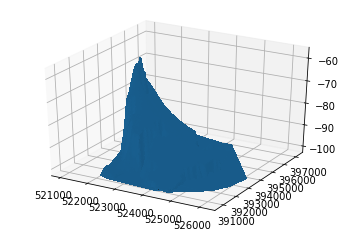

In [1305]:
fig = m.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(X_, Y_, PR_, linewidth=0, antialiased=False)

In [1294]:
d[d["Pr (dBm)"]==n.max(PR_)]

,X(m),Y(m),Pr (dBm)
2602,522438.79,393539.26,-56.25


In [1295]:
d[d["Pr (dBm)"]==-70]

,X(m),Y(m),Pr (dBm)
13,522702.09,393886.79,-70.0
237,522594.80,393117.76,-70.0
936,522721.43,393816.60,-70.0
1027,522640.86,393757.36,-70.0
14497,522252.87,393971.05,-70.0
15967,522110.98,393772.38,-70.0
16678,522660.86,393757.17,-70.0
19453,522696.22,393266.81,-70.0
29344,522473.14,393998.96,-70.0
31130,522570.68,393738.02,-70.0


In [1296]:
r=least_squares(gaussian_2d,x0,loss="soft_l1",f_scale=0.1,args=(x_train,y_train,pr_train))

In [1297]:
print(r.x)

[-1.17828264e+14  5.22438790e+05  3.93539260e+05  5.22640860e+05
  3.93757360e+05]


In [1298]:
prpredg=r.x[0]/(2*n.pi*r.x[3]*r.x[4])*n.exp(-((x_test-r.x[1])**2/(2*r.x[3]**2)+(y_test-r.x[2])**2/(2*r.x[4]**2)))

In [1299]:
print(prpredg)

[-91.12497741 -91.12444474 -91.12483542 ... -91.12440697 -91.12433787
 -91.12468933]


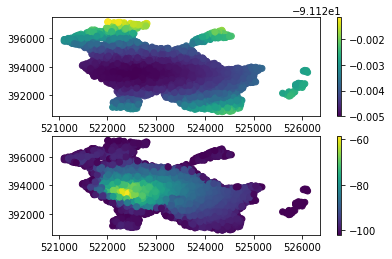

In [1300]:
m.subplot(2,1,1);
m.scatter(x_test,y_test,c=prpredg);
m.colorbar();
m.subplot(2,1,2);
m.scatter(x_test,y_test,c=pr_test);
m.colorbar();

In [1301]:
print(metrics.mean_squared_error(prpredg,pr_test))

84.07700527818244


In [1302]:
prpredgauss=r.x[0]/(2*n.pi*r.x[3]*r.x[4])*n.exp(-((dd['X(m)']-r.x[1])**2/(2*r.x[3]**2)+(dd['Y(m)']-r.x[2])**2/(2*r.x[4]**2)))

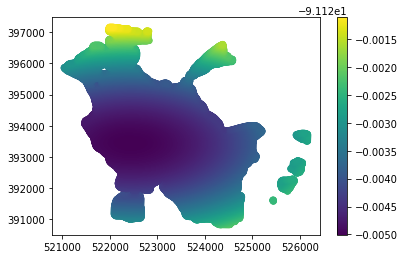

In [1303]:
m.scatter(dd['X(m)'],dd['Y(m)'],c=prpredgauss);
m.colorbar();

In [ ]:
from scipy.optimize import 